In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import hypernetx as hnx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

In [77]:
# Draw hypergraph, line graph, dual of the hypergraph, and line graph of the dual
def check(scenes):
    H = hnx.Hypergraph(scenes)

    G=nx.grid_2d_graph(4,4) 
    
    plt.subplot(221)
    drawHypergraph(H)
    
    print('Original Hypergraph: ')
    plt.subplot(222)
    drawLinegraph(H)
    
    D = H.dual()
    
    plt.subplot(223)
    drawHypergraph(D)
    
    print('\nDual of the Hypergraph: ')
    plt.subplot(224)
    drawLinegraph(D)

# Draw hypergraph
def drawHypergraph(H):
    kwargs = {'layout_kwargs': {'seed': 16}, 'with_node_counts': False, 'with_edge_labels': True}
    
    hnx.drawing.draw(H,
        node_labels_kwargs={
            'fontsize': 12
        },
        edge_labels_kwargs={
            'fontsize': 16
        },
        edges_kwargs={
            'linewidths': 2
        },
        **kwargs
    )

# Draw line graph and check if it is chordal
def drawLinegraph(H):
    G = H.get_linegraph()

    nx.draw(
        G, edge_color='black', width=1, linewidths=1,
        node_size=400, font_size=12, node_color='pink', alpha=1,
        labels={node: node for node in G.nodes()} 
    )
    
    print('The line graph is chordal: ', nx.is_chordal(G))

# Example from Tractability Beyond...

This is an example from a paper by Matthias Lazinger about nest-set width. 

This hypergraph is not $\alpha$-acyclic or $\beta$-acyclic, but has a 2-NEO:
$$
O = (\{c,f\}, \{b,e\}, \{a,d\})
$$

Original Hypergraph: 
The line graph is chordal:  True

Dual of the Hypergraph: 
The line graph is chordal:  True


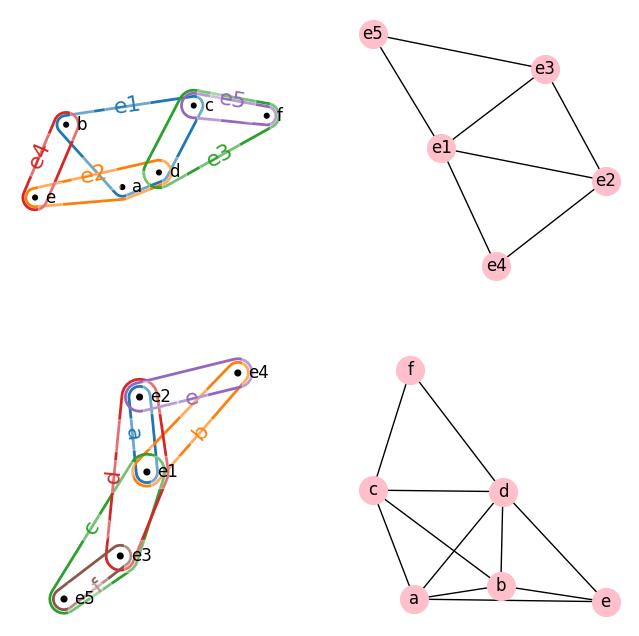

In [78]:
scenes = {
    'e1': ['a','b','c','d'],
    'e2': ['a','d','e'],
    'e3': ['d','c','f'],
    'e4': ['b','e'],
    'e5': ['c','f']
}

check(scenes)

# $\alpha$-acyclic Examples

## Example 1

From *Hypergraph Theory: An Introduction* (pg 73, Fig 4.6). This graph is $\alpha$-acyclic, $\beta$-acyclic, so it has a 1-NEO.

Original Hypergraph: 
The line graph is chordal:  True

Dual of the Hypergraph: 
The line graph is chordal:  True


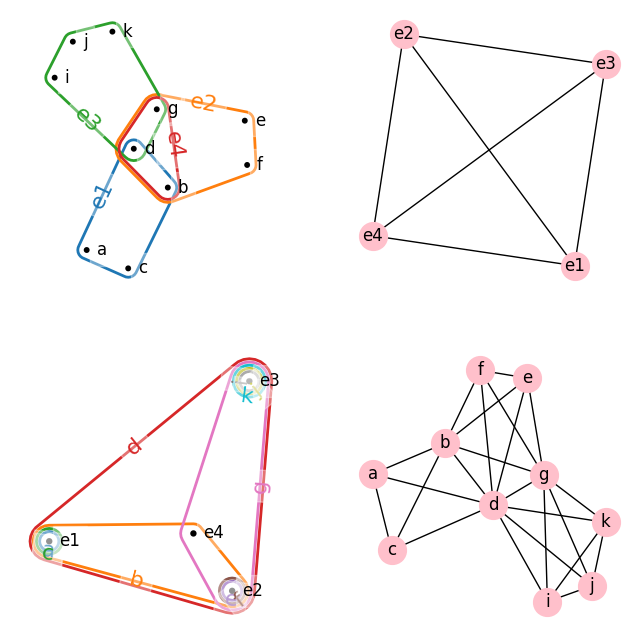

In [80]:
scenes = {
    'e1': ['a', 'b', 'c', 'd'],
    'e2': ['b', 'd', 'e', 'f', 'g'],
    'e3': ['d', 'g', 'i', 'j', 'k'],
    'e4': ['b', 'd', 'g']
}

check(scenes)

## Example 2

From *Hypergraph Theory: An Introduction* (pg 74, Fig. 4.8). This graph is $\alpha$-acyclic, NOT $\beta$-acyclic, but has a 2-NEO:
$$
O = (\{a,b\}, \{m,n\}, \{k,i\}, \{f,l\}, \{g,h\}, \{c,e\}, \{d.j\})
$$

Original Hypergraph: 
The line graph is chordal:  False

Dual of the Hypergraph: 
The line graph is chordal:  True


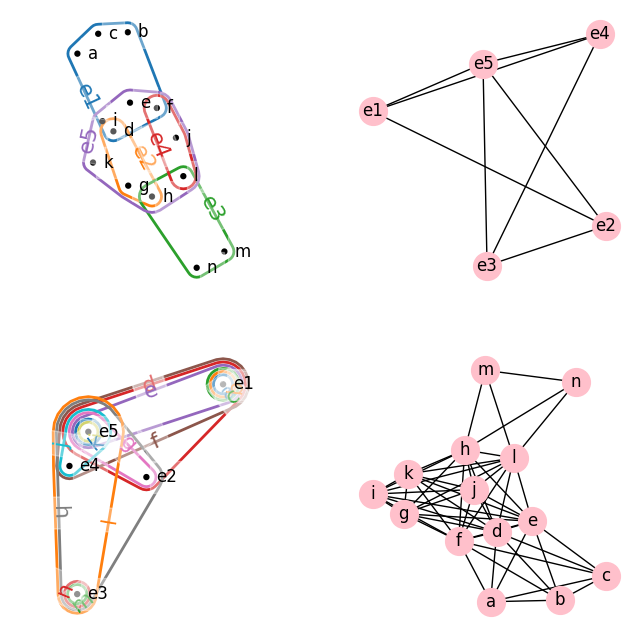

In [81]:
scenes = {
    'e1': ['a', 'b', 'c', 'd', 'e', 'f'],
    'e2': ['d', 'g', 'h'],
    'e3': ['h', 'l', 'm', 'n'],
    'e4': ['f', 'j', 'l'],
    'e5': ['d', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l']
}

check(scenes)

# Normal Hypergraph

From *Hypergraph Theory: An Introduction* (pg 69, Fig. 4.4). This graph is $\alpha$-acyclic, NOT $\beta$-acyclic, no $k$-NEO

Original Hypergraph: 
The line graph is chordal:  True

Dual of the Hypergraph: 
The line graph is chordal:  True


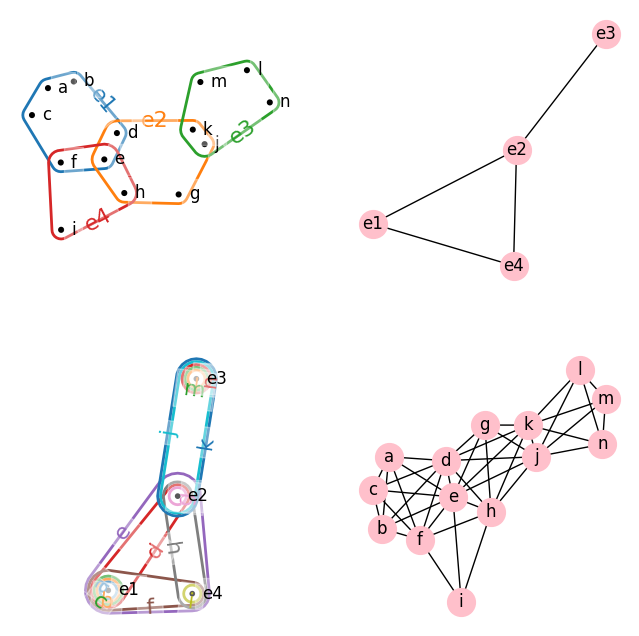

In [86]:
scenes = {
    'e1': ['a', 'b', 'c', 'd', 'e', 'f'],
    'e2': ['d', 'e', 'g', 'h', 'j', 'k'],
    'e3': ['j', 'k', 'l', 'm', 'n'],
    'e4': ['e', 'f', 'h', 'i']
}

check(scenes)

# Beta Triangle

$\alpha$-acyclic but not $\beta$-acyclic, no $k$-NEO

Original Hypergraph: 
The line graph is chordal:  True

Dual of the Hypergraph: 
The line graph is chordal:  True


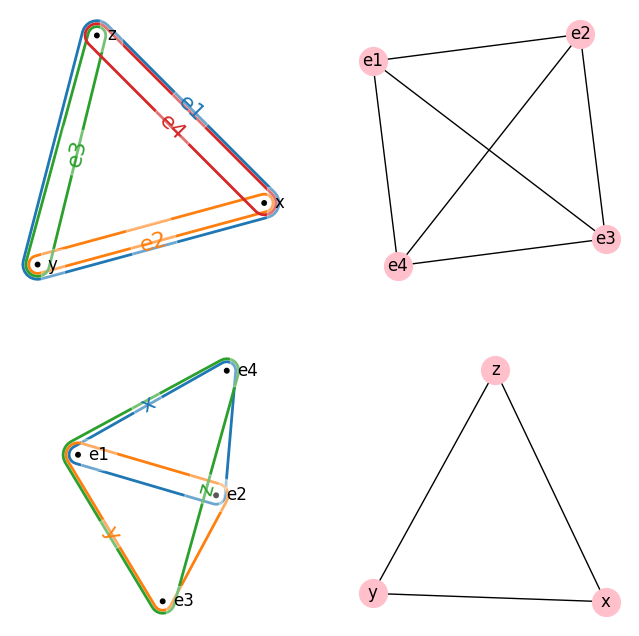

In [88]:
scenes = {
    'e1': ['x', 'y', 'z'],
    'e2': ['x', 'y'],
    'e3': ['y', 'z'],
    'e4': ['x', 'z']
}

check(scenes)

# Tetrahedron

Not $\alpha$-acyclic, not $\beta$-acyclic, no $k$-NEO

Original Hypergraph: 
The line graph is chordal:  True

Dual of the Hypergraph: 
The line graph is chordal:  True


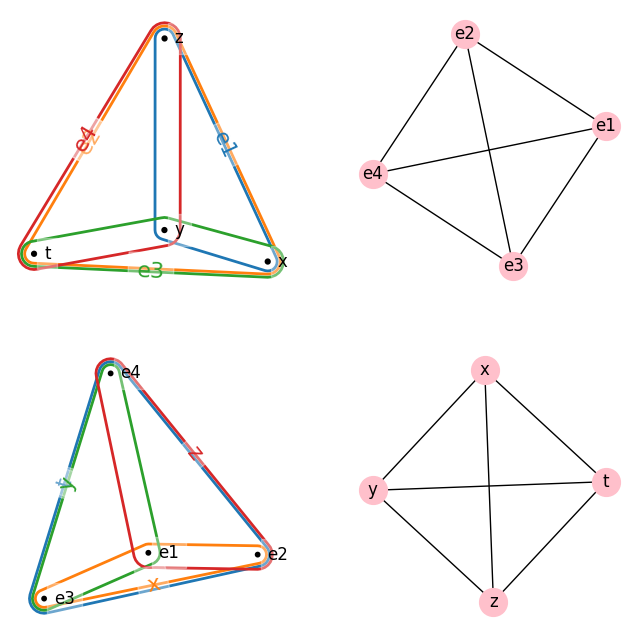

In [89]:
scenes = {
    'e1': ['x', 'y', 'z'],
    'e2': ['x', 't', 'z'],
    'e3': ['x', 'y', 't'],
    'e4': ['y', 't', 'z']
}

check(scenes)

# Square

Not $\alpha$-acyclic, not $\beta$-acyclic, no $k$-NEO

Original Hypergraph: 
The line graph is chordal:  False

Dual of the Hypergraph: 
The line graph is chordal:  False


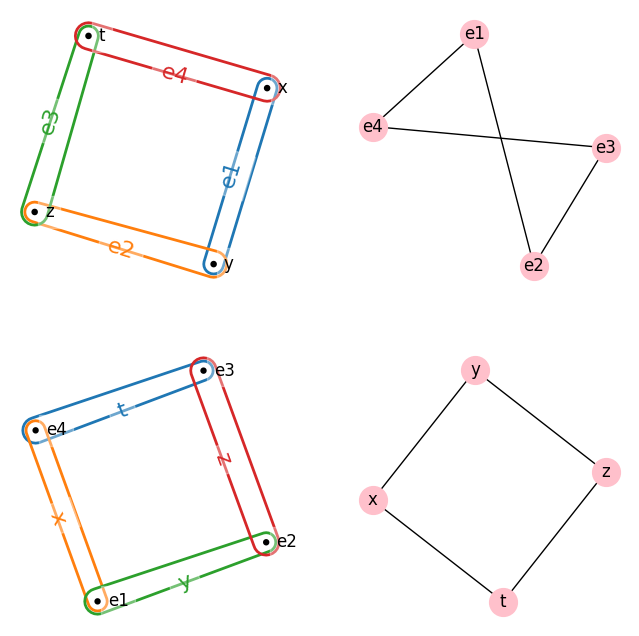

In [90]:
scenes = {
    'e1': ['x', 'y'],
    'e2': ['y', 'z'],
    'e3': ['t', 'z'],
    'e4': ['x', 't']
}

check(scenes)